<a href="https://colab.research.google.com/github/hellodoksa/machine-learning-Project/blob/master/Tensorflow_1_15_0_ver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow==1.15.0


     |████████████████████████████████| 412.3MB 27kB/s 
     |████████████████████████████████| 3.8MB 43.7MB/s 
     |████████████████████████████████| 512kB 48.2MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=f0c73cabb0549ed1197baadffc1a90c48c4dfcf4945fc34c38d1f75d9c697bee
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installatio

In [0]:
import tensorflow as tf 
tf.__version__

'1.15.0'

# Tensorflow 
- 텐서플로는 크게 두 부분으로 나뉜다. 
  - (구성단계) : 첫 부분은 계산 그래프를 만듬
  - (실행단계) : 그래프를 실행  
- 매번  session run이 번거롭기 때문에 with  를 사용하자 .

In [0]:
x = tf.Variable(3 , name = 'x')
y = tf.Variable(2,  name = 'y')
f = x*x + y +2 

In [0]:
with tf.Session() as sess :
  x.initializer.run()
  y.initializer.run()
  result = f.eval()

In [0]:
result

13

- 매번 각 변수를 초기화 하기 힘드니 한번에 할 수 있다. 
- global_variable_initializer ()

In [0]:
init = tf.global_variables_initializer()  # init 노드 준비 
with tf.Session() as sess :
  init.run()
  result2 = f.eval()
result2 

13

In [0]:
# 기본 그래프를 초기화 한다. 
tf.reset_default_graph()

# 노드 값의 생애주기 
- 한 노드를 평가할 때 텐서플로는 이 노드가 의존하고 있는 다른 노드들을 자동을으로 찾아 먼저 평가한다. 
- w와 x를 두번 평가한다. ( 재사용하지 않는다. )
  - 텐서플로는 자동으로 y가 x에 의존한다는 것과 x가 w에 의존한다는 것을 감지 한다. 
  - 그래서 먼저 w를 평가하고 그다음에 x를, 그 다음에 y를 평가해서 y값을 반환 한다. 
  - 마지막으로 z를 평가하기 위해 그래프를 실행한다.
  - 다시 한번 텐서플로는 먼저 w와 x를 평가해야 한다는 것을 감지한다. 
  - 이전에 평가된 w와 x를 재사용하지 않는 다는 점이 중요하다. !

In [0]:
w = tf.constant(3)
x= tf.Variable( 3, name='x')
x = w + 2
y = x + 5
z = x + 3 

with tf.Session() as sess :
  print(y.eval())
  print(z.eval())

10
8


- 단일 프로세스 텐서플로에서는 같은 그래프를 사용하더라도 여러 세션에서 어떤 상태도 공유하지 않습니다. 
- 각 세션은 모든 변수에 대해 고유한 복사본을 가집니다. 
- 변수 상태가 세션이 아니라 서버에 저장되므로 여러 세션이 같은 변수를 공유할 수 있다. 

# 텐서플로를 이용한 선형 회귀 
- 텐서플로 연산은 여러 개의 입력을 받아 출력을 만들 수 있다. 
- 입력과 출력은 텐서라는 다차원 배열이다. 
- Numpy 배열과 비슷하게 텐서는 데이터 타입과 크기를 가진다. (텐서는 python에서 ndarray로 나타남)


### 캘리포니아 주택 가격 데이터셋 
- 넘파이를 대신하여 텐서플로를 통해 정규방정식을 계산하는 이유는 GPU를 사용하기 때문


In [0]:
import numpy as np
from sklearn.datasets import fetch_california_housing 

In [0]:
hausing = fetch_california_housing()
m,n = hausing.data.shape 
m,n

(20640, 8)

In [0]:
# 모든 훈련 샘플에 편향에 대한 입력 특성을 추가한다 
hausing_data_plus_bias = np.c_[np.ones((m,1)) , hausing.data] # np.c_ : 두 개의 1차원 배열을 칼럼으로 세로로 붙여서 2차원 배열 만들기


In [0]:
# 두 개의 텐서플로 상수 노드 x와 y를 만들고 데이터와 타깃을 담는다.
x = tf.constant(hausing_data_plus_bias , dtype=tf.float32 ,name='x')
y = tf.constant(hausing.target.reshape(-1 ,1) , dtype=tf.float32, name ='y')

## 텐서플로의 행렬 연산을 통해 theta를 구한다. 
## theta는 정규방정식의 정의이다. 
# tf.transpose(x)   : 전치행렬 
# tf.matmul         : 점곱 
# tf.matrix_inverse : 역행렬 계산 
xt = tf.transpose(x) # 전치행렬 
theta = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(xt ,x) ) ,xt),y)

In [0]:
with tf.Session() as sess :
  theta_value = theta.eval()
theta_value

array([[-3.7144665e+01],
       [ 4.3637392e-01],
       [ 9.3933418e-03],
       [-1.0714764e-01],
       [ 6.4542186e-01],
       [-4.1016874e-06],
       [-3.7816020e-03],
       [-4.2341197e-01],
       [-4.3682083e-01]], dtype=float32)

# 경사하강법 구현 
- 경사하강법을 사용할때는 입력 특성 벡터를 정규화 하는 것이 중요하다. 
- 그렇지 않으면 훈련 속도가 [느려]진다. 

### 1. 직접 그래디언트 계산 
- tf.reduce_mean() : 텐서의 ㅍㅇ균을 계산하는 노드를 그래프에 추가 

In [0]:
n_epochs = 100 
learning_rate = 0.01

In [0]:
x= tf.constant(hausing_data_plus_bias , dtype = tf.float32 , name ='x')
y=tf.constant(hausing.target.reshape(-1 ,1) , dtype= tf.float32 , name='y')
theta = tf.Variable(tf.random_uniform([n+1 , 1] , -1.0 , 1.0 ) , name = 'theta')
y_pred = tf.matmul(x, theta , name='predictions')

error = y_pred - y 
mse = tf.reduce_mean(tf.square(error) , name ='mse')

In [0]:
# ==  Gradient를 직접 수학적으로 유도 하여 사용함 == # 
gradients = 2/m * tf.matmul(tf.transpose(x) , error )

In [0]:
training_op = tf.assign(theta, theta - learning_rate * gradients )

init = tf.global_variables_initializer()

with tf.Session() as sess :
  sess.run(init)

  for epoch in range(n_epochs) :
    #if epoch % 100 == 0 :
    print("Epoch" , epoch , "MSE = " , mse.eval())
    
  sess.run(training_op)
  best_theta = theta.eval()


Epoch 0 MSE =  1835091.4
Epoch 1 MSE =  1835091.4
Epoch 2 MSE =  1835091.4
Epoch 3 MSE =  1835091.4
Epoch 4 MSE =  1835091.4
Epoch 5 MSE =  1835091.4
Epoch 6 MSE =  1835091.4
Epoch 7 MSE =  1835091.4
Epoch 8 MSE =  1835091.4
Epoch 9 MSE =  1835091.4
Epoch 10 MSE =  1835091.4
Epoch 11 MSE =  1835091.4
Epoch 12 MSE =  1835091.4
Epoch 13 MSE =  1835091.4
Epoch 14 MSE =  1835091.4
Epoch 15 MSE =  1835091.4
Epoch 16 MSE =  1835091.4
Epoch 17 MSE =  1835091.4
Epoch 18 MSE =  1835091.4
Epoch 19 MSE =  1835091.4
Epoch 20 MSE =  1835091.4
Epoch 21 MSE =  1835091.4
Epoch 22 MSE =  1835091.4
Epoch 23 MSE =  1835091.4
Epoch 24 MSE =  1835091.4
Epoch 25 MSE =  1835091.4
Epoch 26 MSE =  1835091.4
Epoch 27 MSE =  1835091.4
Epoch 28 MSE =  1835091.4
Epoch 29 MSE =  1835091.4
Epoch 30 MSE =  1835091.4
Epoch 31 MSE =  1835091.4
Epoch 32 MSE =  1835091.4
Epoch 33 MSE =  1835091.4
Epoch 34 MSE =  1835091.4
Epoch 35 MSE =  1835091.4
Epoch 36 MSE =  1835091.4
Epoch 37 MSE =  1835091.4
Epoch 38 MSE =  183509

In [0]:
best_theta

array([[-2.0573330e+01],
       [-7.7986862e+01],
       [-5.0153912e+02],
       [-1.0451018e+02],
       [-2.1930006e+01],
       [-4.9193598e+04],
       [-7.4161217e+01],
       [-7.0711334e+02],
       [ 2.3812639e+03]], dtype=float32)

### 2. 자동 미분 사용 
- 텐서 플로의 자동 미분 기능이 편미분을 수행해준다. 
- gradient 함수는 하나의 연산 (여기서는 mse)과 변수 리스트 (여기서는 theta 하나)를 받아 각변에 대한 연산의 그래디언트를 계산하는 새로운 연산을 만듭니다. (변수당 하나씩)
- 그러므로 gradients 노드는 theta에 대한 mse의 그래디언트 벡터를 계산한다. 


In [0]:
# ==  Gradient를 Tensorflow에서 제공하는 함수로 해결 == # 
# gradients = 2/m * tf.matmul(tf.transpose(x) , error )
gradients = tf.gradients(mse , [theta])[0]

In [0]:
training_op = tf.assign(theta, theta - learning_rate * gradients )

init = tf.global_variables_initializer()

with tf.Session() as sess :
  sess.run(init)

  for epoch in range(n_epochs) :
    #if epoch % 100 == 0 :
    print("Epoch" , epoch , "MSE = " , mse.eval())
    
  sess.run(training_op)
  best_theta = theta.eval()


Epoch 0 MSE =  273398.16
Epoch 1 MSE =  273398.16
Epoch 2 MSE =  273398.16
Epoch 3 MSE =  273398.16
Epoch 4 MSE =  273398.16
Epoch 5 MSE =  273398.16
Epoch 6 MSE =  273398.16
Epoch 7 MSE =  273398.16
Epoch 8 MSE =  273398.16
Epoch 9 MSE =  273398.16
Epoch 10 MSE =  273398.16
Epoch 11 MSE =  273398.16
Epoch 12 MSE =  273398.16
Epoch 13 MSE =  273398.16
Epoch 14 MSE =  273398.16
Epoch 15 MSE =  273398.16
Epoch 16 MSE =  273398.16
Epoch 17 MSE =  273398.16
Epoch 18 MSE =  273398.16
Epoch 19 MSE =  273398.16
Epoch 20 MSE =  273398.16
Epoch 21 MSE =  273398.16
Epoch 22 MSE =  273398.16
Epoch 23 MSE =  273398.16
Epoch 24 MSE =  273398.16
Epoch 25 MSE =  273398.16
Epoch 26 MSE =  273398.16
Epoch 27 MSE =  273398.16
Epoch 28 MSE =  273398.16
Epoch 29 MSE =  273398.16
Epoch 30 MSE =  273398.16
Epoch 31 MSE =  273398.16
Epoch 32 MSE =  273398.16
Epoch 33 MSE =  273398.16
Epoch 34 MSE =  273398.16
Epoch 35 MSE =  273398.16
Epoch 36 MSE =  273398.16
Epoch 37 MSE =  273398.16
Epoch 38 MSE =  273398

In [0]:
best_theta

array([[ 9.4697914e+00],
       [ 3.5494461e+01],
       [ 2.3402312e+02],
       [ 4.7008373e+01],
       [ 9.9896698e+00],
       [ 1.8891609e+04],
       [ 3.2307907e+01],
       [ 3.1592712e+02],
       [-1.0644103e+03]], dtype=float32)

### 3. 옵티마이져 사용 
- 텐서플로는 자동으로 그래디언트를 계산해준다. 
- 하지만 경사하강법 옵티마이져를 포함하여 여러가지 내장 옵티마지거를 제공한다. 
- 기존에 직접 할당해야 하는데 자동으로 해준다. 


In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

## 경사하강법 예제 # 1

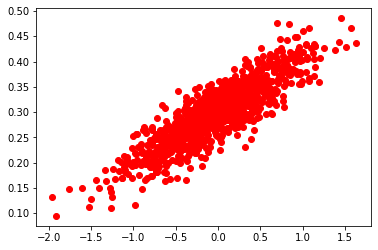

In [0]:
import matplotlib.pyplot as plt

# 랜덤 데이터 생성 
num_points = 1000
x_data = []
y_data = []
for i in range(num_points):
    x1 = np.random.normal(0.0, 0.55)
    y1 = x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
    x_data.append(x1)
    y_data.append(y1)
plt.plot(x_data, y_data, 'ro')

In [0]:
#경사하강법의 손실 함수를 최소화하는 모델 파라미터를 찾기위해 
# 텐서플로의 GradientDescentOptimizer를 사용 

#optimizer = tf.train.GradientDescentOptimizer(0.5)
#train = optimizer.minimize(loss)

In [0]:
# 학습을 하기 위해 그래프 생성 

g1 = tf.Graph() 
with g1.as_default():
    W = tf.Variable(tf.random_uniform([1], -1.0, 1.0)) 
    b = tf.Variable(tf.zeros([1])) 
    y = W * x_data + b 
    loss = tf.reduce_mean(tf.square(y - y_data))
    dW, db = tf.gradients(loss, [W, b]) 
    update_W = tf.assign(W, W - 0.5 * dW) 
    update_b = tf.assign(b, b - 0.5 * db)


In [0]:
tf.random_uniform([1], -1.0, 1.0)

<tf.Tensor 'random_uniform_9:0' shape=(1,) dtype=float32>

In [0]:
# 손실함수 모델 파라메타  w, b에 대해 
# 손실 함수 loss의 미분을 구하여 각각 w와 b에 업데이트 하는것 
# gradients 함수로써 구현 

# dW, db = tf.gradients(loss, [W, b])
# update_W = tf.assign(W, W - 0.5 * dW)
# update_b = tf.assign(b, b - 0.5 * db)

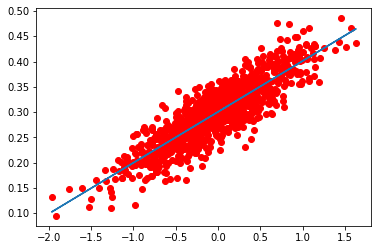

In [0]:
# 모델을 훈련 시킨다는것은 데이터를 이용해 오차를 구하고 오차에 해단 그래디언트를 계산해서 
# 모델 파라미터를 업데이트 하는 것이다. 
# 텐서플로로 실행할 작업은 모델 파라미터를 업데이트 하는 update_w, update_b 텐서를 실행하는 것!
with tf.Session(graph=g1) as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(20):
      sess.run([update_W, update_b])
      Wp, bp = sess.run([W, b])
    # 산포도 그리기
    plt.plot(x_data, y_data, 'ro')
    # 직선 그리기
    plt.plot(x_data, Wp * x_data + bp)

# 훈련 알고리즘에 데이터 주입 
- [ placeholder ]  : 실제로 아무 계산도 하지 않는 특수한 노드 , 실행 시에 주입한 데이터를 출력하기만 한다. 
- 이 노드는 전형적으로 훈련을 하는 동안 텐서플로에 훈련 데이터를 전달하기 위해 사용됩니다. 
- 실행 시 플레이스홀더에 값을 지정하지 않으면 예외가 발생 


In [0]:
# placeholder()를 호출하여 노드를 생성. 출력 텐서의 데이터 타입을 지정한다. 
# (None ,3) : 차원은 none으로 설정하여 어떤 크기도 가능하다는 의미가 된다. 
# 하지만 열은 꼭 3개가 되야 한다. 
a = tf.placeholder(tf.float32 , shape = (None ,3 ))


b = a + 5 
with tf.Session() as sess :
  b_val_1 = b.eval(feed_dict = { a: [[1, 2, 3 ]] })
  b_val_2 = b.eval(feed_dict = { a: [[1, 2, 3 ] , [4 , 5 , 6]] })


print(b_val_1)
print(b_val_2)


[[6. 7. 8.]]
[[ 6.  7.  8.]
 [ 9. 10. 11.]]


In [0]:
# 구성 단계 : x, y의 정의를  placeholder로 변경 
x = tf.placeholder(tf.float32 , shape=(None , n+1) , name= 'x')
y = tf.placeholder(tf.float32 , shape=(None , 1) , name= 'y')


In [0]:
batch_size = 100 
n_batches = int (np.ceil( m / batch_size))
print (m)

20640
